<a href="https://colab.research.google.com/github/bivekpok/DSPS_BPokhrel/blob/main/HW7/HW7_pokhrel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install umap-learn
!pip install umap-learn[plot]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.8/90.8 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 21.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.4-py3-none-any.whl size=86770 sha256=793e7e3f83ca5c21976dded8eb8e5d6f534e232852a5a5089fef4b40f4f1a418
  Stored in directory: /root/.cache/pip/wheels/fb/66/29/199acf5784d0f7b8add6d466175ab45506c96e386ed5dd0633
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55615 sha256=aebdd711cb32a455afab0f6d0b2ff1e861cce9363ae9d968b0120403f962b6f2
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
Successfully built umap-learn pynndescent
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 21.0 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import pylab as plt
import scipy as sp
import sklearn as skl
from sklearn import cluster
import umap
import umap.plot
from scipy.cluster.hierarchy import dendrogram, linkage
import missingno as msno
import plotly.express as px
%pylab inline

/usr/local/lib/python3.10/dist-packages/umap/plot.py:203: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit(nopython=False)


Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.10/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


# I  read the data
in https://github.com/fedhere/DSPS_FBianco/tree/master/HW7
its called kidpackgene.csv

In [3]:
csv_url = 'https://raw.githubusercontent.com/fedhere/DSPS_FBianco/main/HW7/kidpackgenes.csv'
genes = pd.read_csv(csv_url, index_col=None)

make sure you are not reading the index as a feature! you can control this with the index_col paramter of the function pd.read_csv or remove the column after you read the data in


make sure you show the data and look at it carefully

In [4]:
genes.shape

(4224, 75)

In [5]:
genes.head()

Unnamed: 0         1         2         3         4         5         6  \
0           1 -0.146342 -0.520637  0.175828 -0.323736  0.172691  0.025156   
1           2 -0.465767  0.155823  0.226344 -0.547542  0.041096  0.137012   
2           3 -0.088964 -0.208241 -0.151039 -0.288229 -0.425568  0.121006   
3           4 -0.327696 -1.714948  0.068710 -0.168257 -0.471577  0.279013   
4           5 -0.092327 -0.660456  0.075948 -0.646501 -0.046137 -0.010305   

          7         8        10  ...        76        77        78        79  \
0  0.024812  0.172268  0.207188  ...  0.240705 -0.347746 -0.001797 -0.260594   
1  0.102497 -0.034277  0.500871  ...  0.371435 -0.447105 -0.134904 -0.250699   
2 -0.097883 -0.007597  0.329636  ... -0.014990 -0.458297 -0.050852 -0.168500   
3 -0.060734 -0.222574  0.658097  ...  0.153765 -0.140409 -0.119515 -0.289881   
4  0.368476 -0.043832 -0.321060  ... -0.033032  0.394082  0.173515 -0.194819   

         81        83        84        85        86        87  
0  0.105968  0.110885 -0.006975  0.550118  0.118934  0.327248  
1  0.164698 -0.035022  0.250384  0.463746 -0.514230  0.200956  
2  0.078716 -0.032231 -0.116947 -0.199880 -0.415793 -0.032004  
3  0.944493 -0.142710 -1.119866 -0.215536  0.345946  0.056442  
4  0.149131 -0.097285 -0.288192 -0.491920 -0.722120  0.055477  

[5 rows x 75 columns]

In [6]:
genes.describe()

Unnamed: 0            1            2            3            4  \
count  4224.000000  4224.000000  4224.000000  4224.000000  4224.000000   
mean   2112.500000    -0.094115    -0.027780    -0.001672    -0.110167   
std    1219.508098     0.502677     0.340808     0.328042     0.692851   
min       1.000000    -2.205219    -1.779857    -3.072872    -3.491640   
25%    1056.750000    -0.394770    -0.227638    -0.182975    -0.528570   
50%    2112.500000    -0.069031    -0.016486    -0.014913    -0.046870   
75%    3168.250000     0.235924     0.178946     0.167848     0.376756   
max    4224.000000     2.403599     1.609597     2.357123     1.987768   

                 5            6            7            8           10  ...  \
count  4224.000000  4224.000000  4224.000000  4224.000000  4224.000000  ...   
mean     -0.047817    -0.000598    -0.043284    -0.029803    -0.055334  ...   
std       0.434918     0.348743     0.377675     0.350009     0.477607  ...   
min      -2.479485    -2.767680    -1.807954    -1.835609    -3.214822  ...   
25%      -0.277542    -0.178646    -0.292570    -0.223971    -0.312487  ...   
50%      -0.018104     0.021162    -0.072925    -0.018363    -0.066373  ...   
75%       0.217731     0.208004     0.168238     0.182520     0.205242  ...   
max       2.278563     2.106546     1.957411     1.807777     2.719371  ...   

                76           77           78           79           81  \
count  4224.000000  4224.000000  4224.000000  4224.000000  4224.000000   
mean     -0.033086    -0.050599    -0.023801    -0.042946     0.020522   
std       0.482347     0.410243     0.327410     0.354847     0.389799   
min      -2.946771    -3.281180    -2.787443    -1.938678    -2.932198   
25%      -0.315895    -0.298579    -0.191197    -0.259851    -0.207651   
50%      -0.026565    -0.042374    -0.010210    -0.015849    -0.001221   
75%       0.241220     0.200383     0.160373     0.195828     0.226961   
max       3.058383     1.960692     1.940195     1.352897     2.451836   

                83           84           85           86           87  
count  4224.000000  4224.000000  4224.000000  4224.000000  4224.000000  
mean     -0.051150     0.004469    -0.001898    -0.143864    -0.002374  
std       0.401593     0.479766     0.487669     0.532901     0.346003  
min      -3.054572    -3.189679    -2.955538    -2.909000    -1.563549  
25%      -0.259171    -0.242053    -0.264326    -0.441299    -0.210836  
50%      -0.024906    -0.006854    -0.021976    -0.095412    -0.016940  
75%       0.195206     0.243014     0.237617     0.208726     0.189075  
max       1.733719     2.586922     3.230761     1.583828     1.694063  

[8 rows x 75 columns]

# II  Explore and preprocess the data  explore the data.


## II a
missing values? (remember you can use the missingno package and visualize the missing values!). What should you do with them?

<Axes: >

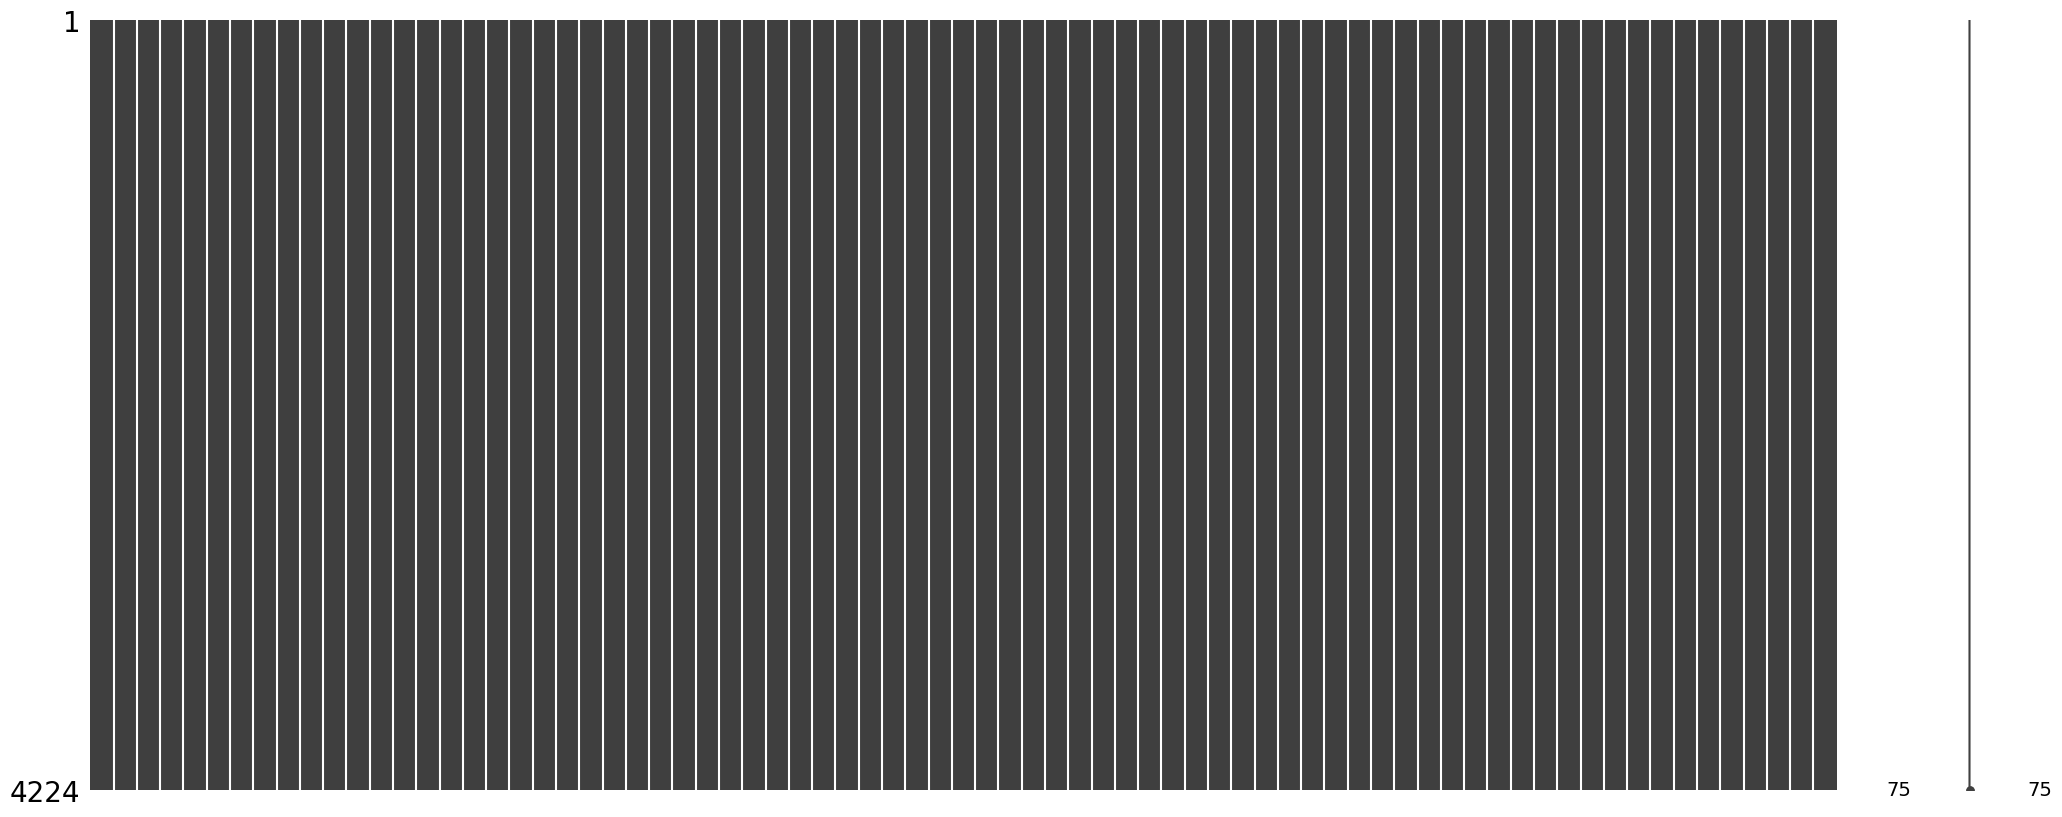

In [7]:
msno.matrix(genes)
# msno.bar(genes)
# plt.show()

## Fig 1: matrix plot of the dataset where the filled bars represents the non NAN values, this is plotted to see is there is any NAN values in the dataset.

## II b
whiten it, normalize it, scale it. What is appropriate? discuss your choices

In [8]:
## normalize it to give all feature equal spacing/metric
scaler = skl.preprocessing.StandardScaler()
scaledgenes = scaler.fit_transform(genes)

In [9]:

scaledgenes.mean(0).round(2), scaledgenes.std(0)
# scaledgenes.mean(0).round(2).shape

(array([-0.,  0., -0.,  0., -0., -0., -0.,  0., -0., -0.,  0.,  0., -0.,
         0.,  0., -0.,  0., -0.,  0., -0.,  0.,  0., -0., -0.,  0.,  0.,
         0., -0., -0.,  0.,  0., -0.,  0., -0.,  0., -0., -0.,  0., -0.,
        -0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -0., -0.,  0.,  0.,
         0.,  0.,  0., -0.,  0., -0.,  0., -0., -0.,  0.,  0., -0.,  0.,
         0., -0., -0., -0.,  0., -0.,  0.,  0., -0., -0.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1.]))

# III Visualize the data


## III-a calculate and plot a t-SNE rojection of the data on an optimal 2D plane

In [10]:
tsne = skl.manifold.TSNE()



The hyperparameteres perplexity and possibly early_exaggeration may significantly impact the result. Find values that give you some structure in the data. Make sure you read the docstring and info on tSNE!

In [11]:
#delete
tsne = skl.manifold.TSNE(n_components=2, perplexity=80, early_exaggeration=12)
twodproj = tsne.fit_transform(scaledgenes)



In [12]:
twodproj.shape

(4224, 2)

plot the TSNE 2D projection


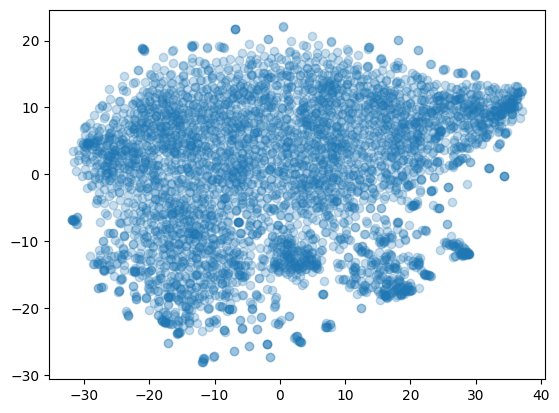

In [13]:
plt.scatter(twodproj[:,0],twodproj[:,1],alpha= 0.25)
# plt.plot(twodproj[:,0],twodproj[:,1],alpha= 0.25)

## Fig 2: t_SNE plot of the points from 75 feature space to 2 dimensional space. This is plotted to better visualize the points and the spacing bettwen standerized points from the dataset.

## III-b calculate and plot the UMAP 2D projection

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


(4224, 2)


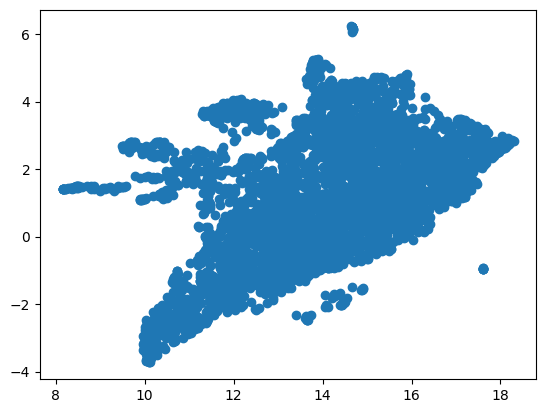

In [103]:
mapper = umap.UMAP(n_components=2, random_state=42).fit_transform(scaledgenes)
print(mapper.shape)
# ax = plt.subplot()
# umap.plot.points(mapper.transform)
plt.scatter(mapper[:,0], mapper[:,1])

# IV K-MEANS Clustering

## IV-a find the best number of culsters for this dataset

create a function that measures the intracluster variance

the intracluster variance is the sum of the variance of each cluster
$V =\sum_J \sum_i{(X_{i\in j} - \bar{X_j})^2}$ for $i$ points in $j$ clusters

In [15]:
#delete
def calICVar(X, labels):
    """calculates the intracluster variance of the k-MEANS algorithm
    X: the input data (ndarray)
    labels: the labels indicating the cluster of each datapoint: same number of data as X
    """
    label_var = []
    for label in np.unique(labels):
      Xm = np.mean(X[labels ==label])
      label_var.append(np.sum((X[labels ==label] -Xm)**2))
      print(label_var)

    icvar = np.sum(label_var)
    return icvar


In [16]:
k_means = cluster.KMeans(n_clusters = 2).fit(scaledgenes)
k_means.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([[-0.03868384,  0.35569791,  0.2833505 ,  0.24182547,  0.30735791,
         0.3079957 ,  0.24026897,  0.16336811,  0.18685806,  0.15287075,
         0.3137793 ,  0.24635291,  0.33754411,  0.16127863,  0.15386464,
         0.32481358,  0.30008673,  0.24768265,  0.32858196,  0.32513513,
         0.09067585,  0.25669824,  0.30546215,  0.24027813,  0.35181717,
         0.29134665,  0.32882838,  0.31465729,  0.32887948,  0.24799691,
         0.28692669,  0.31366469,  0.20335432,  0.25282206,  0.26223456,
         0.10068748,  0.2160752 ,  0.20592064,  0.30413832,  0.23679631,
         0.12926551,  0.24276286,  0.25927547,  0.34289074,  0.26895403,
         0.28244739,  0.35282087,  0.24691832,  0.18071961,  0.21885974,
         0.14167079,  0.37251169,  0.31460579,  0.36445517,  0.36861058,
         0.36490469,  0.3073268 ,  0.30760445,  0.28173811,  0.29133562,
         0.25213814,  0.23314764,  0.33139548,  0.12967717,  0.36993914,
         0.20132445,  0.31497258,  0.29574844,  0.3

cluster the data with K-Means using 1 to 10 clusters. Calculate the intracluster variance and look for an "elbow" in the value of the intracluster variance as a function of number of clusters/ What is the optimal number of clusters?

In [17]:
vars = [] #list of intracluster variance values for KMeans being run with 1->10 clusters
for i in range(10):
  k_means = cluster.KMeans(n_clusters = i+1).fit(scaledgenes)
  labels= k_means.labels_
  print('labels')
  print(labels)
  vars.append(calICVar(scaledgenes, labels))




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


labels
[0 0 0 ... 0 0 0]
[316799.99999999994]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


labels
[0 0 0 ... 0 1 1]
[167691.95823958097]
[167691.95823958097, 88668.52633139308]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


labels
[2 2 1 ... 1 1 0]
[40767.802678189175]
[40767.802678189175, 89859.22612684574]
[40767.802678189175, 89859.22612684574, 106259.61124923242]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


labels
[3 3 0 ... 0 1 2]
[70612.37186144228]
[70612.37186144228, 31974.010566582485]
[70612.37186144228, 31974.010566582485, 32943.58152581835]
[70612.37186144228, 31974.010566582485, 32943.58152581835, 102298.21295243538]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


labels
[1 1 4 ... 4 3 0]
[29770.583220643864]
[29770.583220643864, 48629.94762177238]
[29770.583220643864, 48629.94762177238, 64777.668288860536]
[29770.583220643864, 48629.94762177238, 64777.668288860536, 31735.73832848463]
[29770.583220643864, 48629.94762177238, 64777.668288860536, 31735.73832848463, 63023.431081616574]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


labels
[4 4 1 ... 1 5 0]
[35952.909011509946]
[35952.909011509946, 57473.62824646904]
[35952.909011509946, 57473.62824646904, 22878.61922450416]
[35952.909011509946, 57473.62824646904, 22878.61922450416, 40058.05590701342]
[35952.909011509946, 57473.62824646904, 22878.61922450416, 40058.05590701342, 44441.61969945027]
[35952.909011509946, 57473.62824646904, 22878.61922450416, 40058.05590701342, 44441.61969945027, 31302.730675696257]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


labels
[6 6 5 ... 5 4 0]
[27476.68515824542]
[27476.68515824542, 42701.64405491888]
[27476.68515824542, 42701.64405491888, 18553.58926900989]
[27476.68515824542, 42701.64405491888, 18553.58926900989, 34995.15200869635]
[27476.68515824542, 42701.64405491888, 18553.58926900989, 34995.15200869635, 30989.31199924214]
[27476.68515824542, 42701.64405491888, 18553.58926900989, 34995.15200869635, 30989.31199924214, 44693.248529203214]
[27476.68515824542, 42701.64405491888, 18553.58926900989, 34995.15200869635, 30989.31199924214, 44693.248529203214, 32917.28821127623]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


labels
[4 4 1 ... 1 6 5]
[31943.74615388253]
[31943.74615388253, 45018.37242791165]
[31943.74615388253, 45018.37242791165, 37517.71309204334]
[31943.74615388253, 45018.37242791165, 37517.71309204334, 19365.441915603893]
[31943.74615388253, 45018.37242791165, 37517.71309204334, 19365.441915603893, 33298.18483511884]
[31943.74615388253, 45018.37242791165, 37517.71309204334, 19365.441915603893, 33298.18483511884, 31466.154688842766]
[31943.74615388253, 45018.37242791165, 37517.71309204334, 19365.441915603893, 33298.18483511884, 31466.154688842766, 21859.965905767036]
[31943.74615388253, 45018.37242791165, 37517.71309204334, 19365.441915603893, 33298.18483511884, 31466.154688842766, 21859.965905767036, 10013.074821591974]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


labels
[4 4 0 ... 2 2 1]
[25436.323662128292]
[25436.323662128292, 22281.58210514403]
[25436.323662128292, 22281.58210514403, 22080.75271382613]
[25436.323662128292, 22281.58210514403, 22080.75271382613, 16845.558050495416]
[25436.323662128292, 22281.58210514403, 22080.75271382613, 16845.558050495416, 33629.787928813115]
[25436.323662128292, 22281.58210514403, 22080.75271382613, 16845.558050495416, 33629.787928813115, 10442.053660622974]
[25436.323662128292, 22281.58210514403, 22080.75271382613, 16845.558050495416, 33629.787928813115, 10442.053660622974, 27729.38734257688]
[25436.323662128292, 22281.58210514403, 22080.75271382613, 16845.558050495416, 33629.787928813115, 10442.053660622974, 27729.38734257688, 39801.43754200371]
[25436.323662128292, 22281.58210514403, 22080.75271382613, 16845.558050495416, 33629.787928813115, 10442.053660622974, 27729.38734257688, 39801.43754200371, 30625.224521501717]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


labels
[9 9 1 ... 1 7 3]
[21179.949778887727]
[21179.949778887727, 33712.32318615527]
[21179.949778887727, 33712.32318615527, 21879.41897212611]
[21179.949778887727, 33712.32318615527, 21879.41897212611, 23108.550583855922]
[21179.949778887727, 33712.32318615527, 21879.41897212611, 23108.550583855922, 16160.96399773546]
[21179.949778887727, 33712.32318615527, 21879.41897212611, 23108.550583855922, 16160.96399773546, 33849.31039027282]
[21179.949778887727, 33712.32318615527, 21879.41897212611, 23108.550583855922, 16160.96399773546, 33849.31039027282, 10013.074821591974]
[21179.949778887727, 33712.32318615527, 21879.41897212611, 23108.550583855922, 16160.96399773546, 33849.31039027282, 10013.074821591974, 21811.505627277664]
[21179.949778887727, 33712.32318615527, 21879.41897212611, 23108.550583855922, 16160.96399773546, 33849.31039027282, 10013.074821591974, 21811.505627277664, 15990.070707026878]
[21179.949778887727, 33712.32318615527, 21879.41897212611, 23108.550583855922, 16160.96399

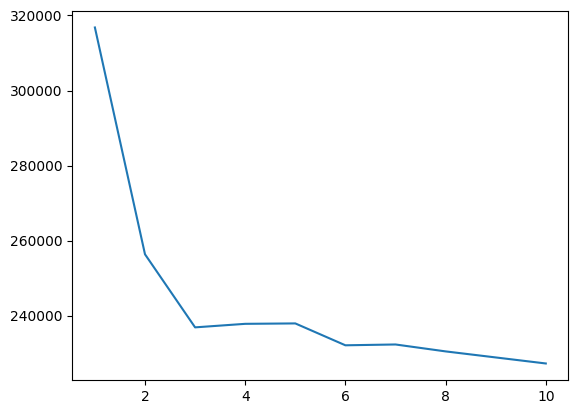

In [18]:
# elbow plot
plt.plot(list(range(1, 11)), vars)

## fig 3: Elblow plot where x axis is the number of cluster and y axis calcualtes the inter cluster variance. This is plotted to choose the right number of cluster to usein kmeans clustering. A sudden drop at 3 indicates that 3 is a good choice for n_cluster.

Based on the elbow plot above (see also slides) what is the right number of clusters for this dataset? DISCUSS!

## based on the elbow plot I think it is 3 as after 3 the slope of decrease in abrutly decreased

## IV-b Cluster the data with k-Means into the number of clusters as determined from the elbow

In [19]:
geneclustersKM = cluster.KMeans(n_clusters = 3).fit_predict(scaledgenes)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [21]:
tsne = skl.manifold.TSNE(n_components=2, perplexity=80, early_exaggeration=12)
twodproj = tsne.fit_transform(scaledgenes)

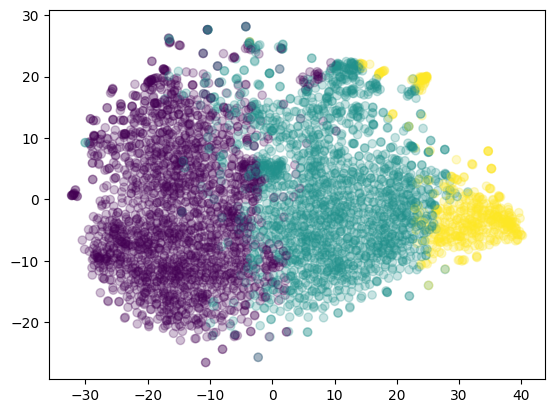

In [22]:
plt.scatter(twodproj[:,0],twodproj[:,1],c=geneclustersKM, alpha= 0.25)
# plt.plot(twodproj[:,0],twodproj[:,1],alpha= 0.25)

## t-SNE plot for the K means for n_clusters = 3, this is plotted in 2D to beter visualize the clustering and color here represents different cluster.

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


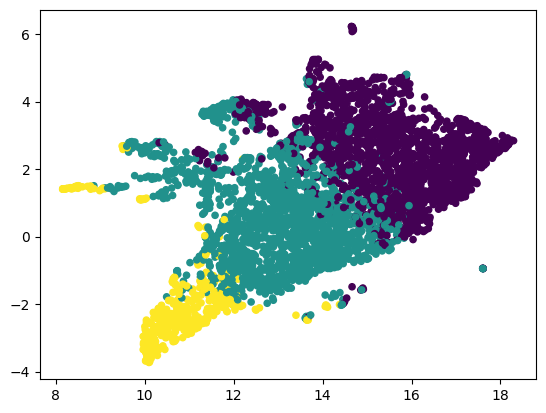

In [31]:
umap_model = umap.UMAP(n_components=2, random_state=42)
umap_projection = umap_model.fit_transform(scaledgenes)
# plt.subplot(2, len(cluster_numbers), len(cluster_numbers) + i + 1)
plt.scatter(umap_projection[:, 0], umap_projection[:, 1], c=geneclustersKM, cmap='viridis', s=20)
# plt.title(f'UMAP, K={num_clusters}')

## Fig 4: Umap plot for the K means for n_clusters = 3, this is plotted in 2D to beter visualize the clustering and color here represents different cluster.

## IV-c plot and plot the t-SNY and UMAP projections of the data using the cluster number as color

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

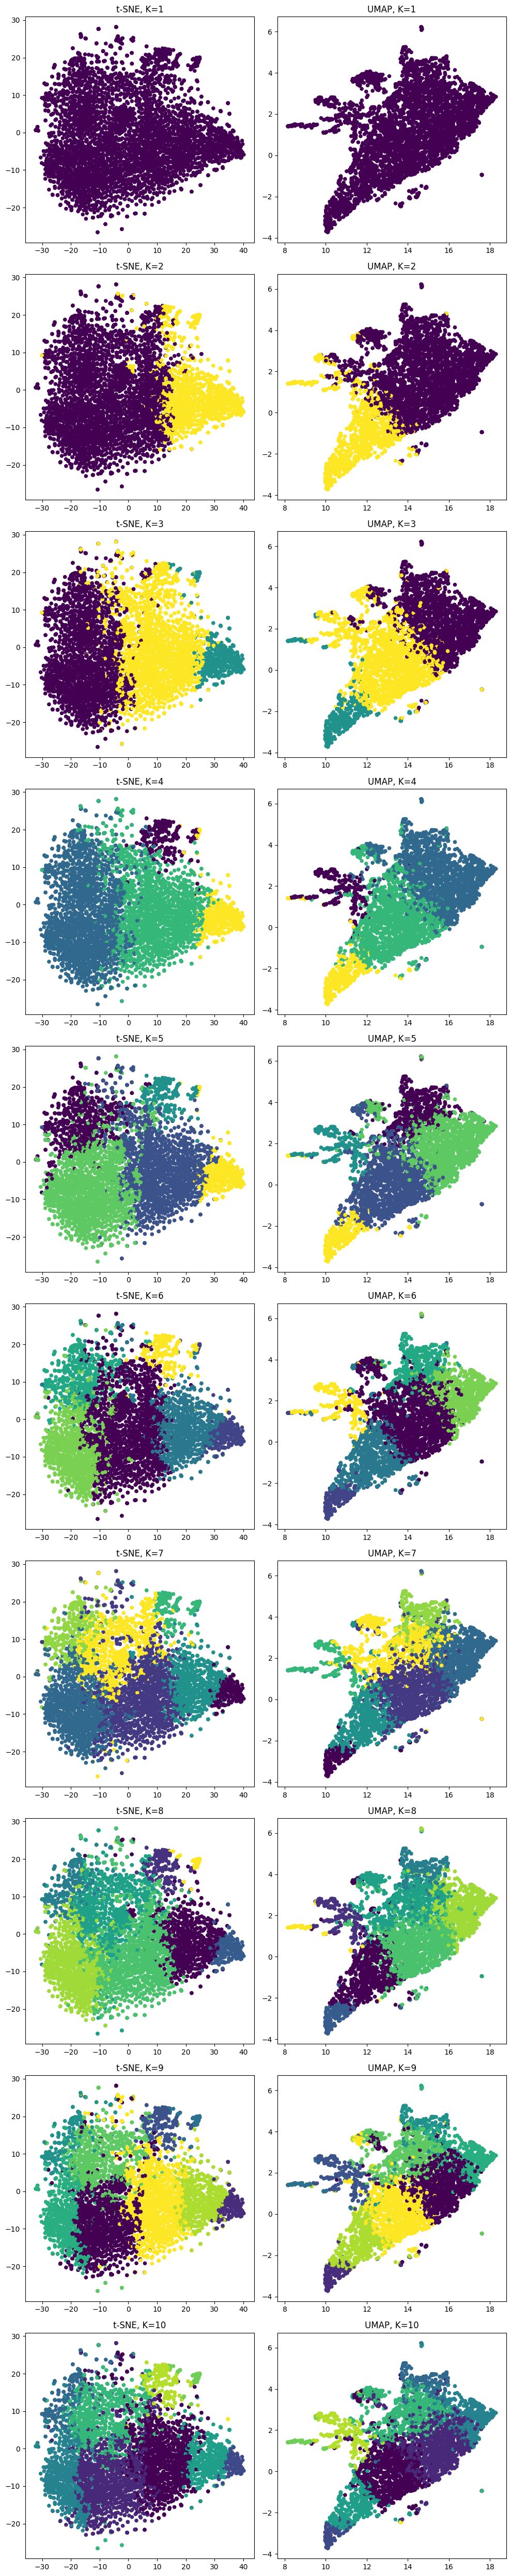

In [36]:
import matplotlib.pyplot as plt
from sklearn import cluster

# Assuming you have twodproj and umap_projection defined

cluster_numbers = range(1, 11)  # Range from 1 to 10

# Create figure and axes
fig, axes = plt.subplots(len(cluster_numbers), 2, figsize=(10, 5 * len(cluster_numbers)))

for i, num_clusters in enumerate(cluster_numbers):
    # Cluster assignments using KMeans
    cluster_assignments = cluster.KMeans(n_clusters=num_clusters).fit_predict(scaledgenes)

    # Plotting t-SNE
    axes[i, 0].scatter(twodproj[:, 0], twodproj[:, 1], c=cluster_assignments, cmap='viridis', s=20)
    axes[i, 0].set_title(f't-SNE, K={num_clusters}')

    # Plotting UMAP
    axes[i, 1].scatter(umap_projection[:, 0], umap_projection[:, 1], c=cluster_assignments, cmap='viridis', s=20)
    axes[i, 1].set_title(f'UMAP, K={num_clusters}')

# Adjust layout
plt.tight_layout()
plt.show()


## This is the t-SNE and Umap plot for various values of the cluster in K means color represents diffrent cluster and kk represents number of cluster choosen to run the K means. This is plotted in 2D to better visualize the points and clusters formed.

# Use dDSCAN or hierarchical clustering (461 pick either DBSCAN or hierarchical) and redo the clustering. Can you find the same number of clusters?

# V DBSCAN Clustering


## V-a measure the distribution of Euclidean distances

It is important to choose the hyperparamters of DBSCAN wisely. Initialize the _eps_ parameter of DBSCAN based on the mean Euclidean distance. To that end, calculate and plot the Euclidean distance matrix of each point pairs if you have not yet

In [39]:
dists = sp.spatial.distance.pdist(scaledgenes)

TypeError: ignored

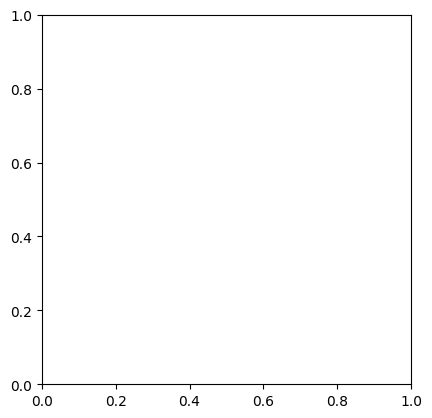

In [40]:
plt.imshow(dists)
## not sure

 make a histogram of the pairwise distances. You should choose a value to initialize dbscan that is below the mean

Text(0.5, 1.0, 'Histogram of pair distance')

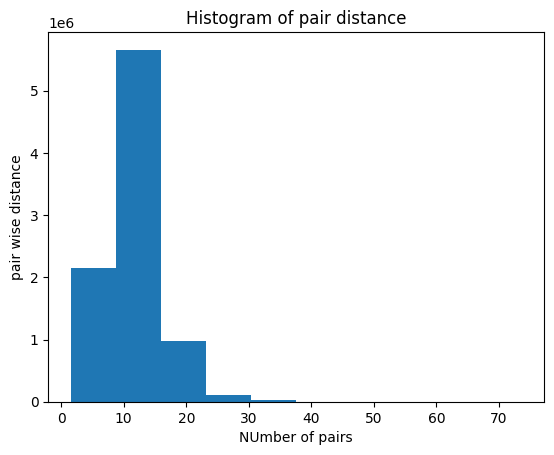

In [102]:
plt.hist(dists)
plt.xlabel('NUmber of pairs')
plt.ylabel('pair wise distance')
plt.title('Histogram of pair distance')

## Fig: Histogram of the number os pairs distance betweent the points in 75 dim space. This is to plotted to choose the right value of the parameter for DBSCAN as it has to be less than mean distance.

## V-b Rub DBSCAN

initialize the dbscan _eps_ hyperparameter value appropriately and fit a dbscan model to the data plot the 2D TSNE projection colorcoded as before. How many clusters do you have, how many outliers? is that a significant number?

In [81]:
geneclustersDBS = skl.cluster.DBSCAN(eps = 6.8, min_samples= 5).fit(scaledgenes)

np.unique(geneclustersDBS.labels_)

array([-1,  0,  1,  2,  3])

In [82]:
geneclustersDBS.labels_.shape


(4224,)

## V-c plot the data in the t-SNE and UMAP projections color-coded by DBSCAN cluster

Text(0.5, 1.0, 'UMAP, K=5')

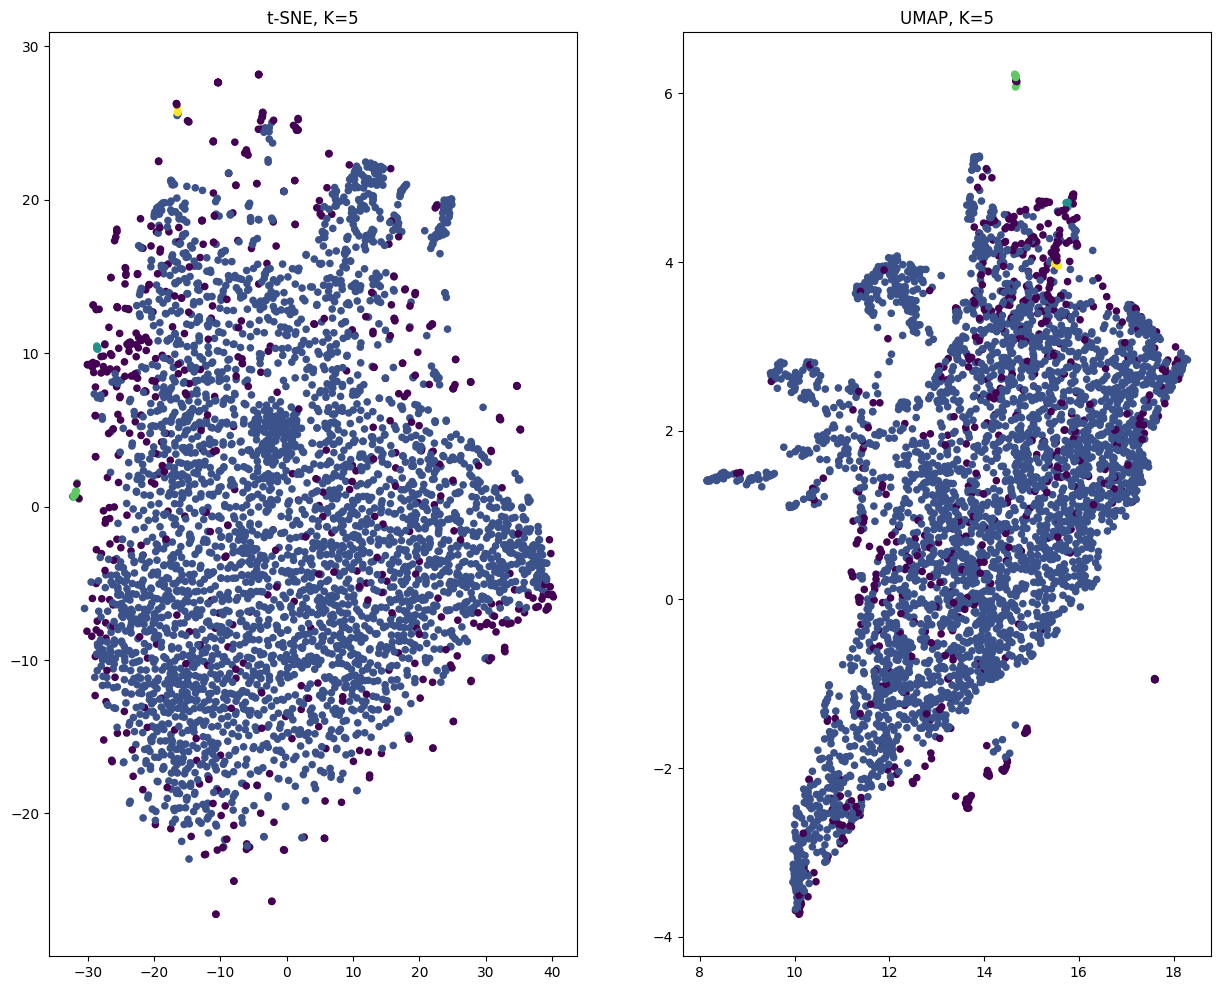

In [83]:
    # Plotting t-SNE

fig, axes = plt.subplots(1,2, figsize = (15,12))
axes[0].scatter(twodproj[:, 0], twodproj[:, 1], c=geneclustersDBS.labels_, cmap='viridis', s=20)
axes[0].set_title(f't-SNE, K={len(np.unique(geneclustersDBS.labels_))}')

# Plotting UMAP
axes[1].scatter(umap_projection[:, 0], umap_projection[:, 1], c=geneclustersDBS.labels_, cmap='viridis', s=20)
axes[1].set_title(f'UMAP, K={len(np.unique(geneclustersDBS.labels_))}')


## Fig 4: T-SNE and UMAP plot for DBSCAN clustering, this is plotted in 2D space to better visualize it and also compare it with K_means algo.

In [86]:
# umap.plot.points(umap_projection, labels=geneclustersDBS.labels_)
umap_projection.shape

(4224, 2)

# VI Agglomerative clustering


## VI-a run agglomerative clustering with standard distance choices: ward linkage and Euclidean distance

In [88]:
clusteringAg = skl.cluster.AgglomerativeClustering(n_clusters=3, linkage='ward')

choose ward linkage and plot the dendrogram of the clusters

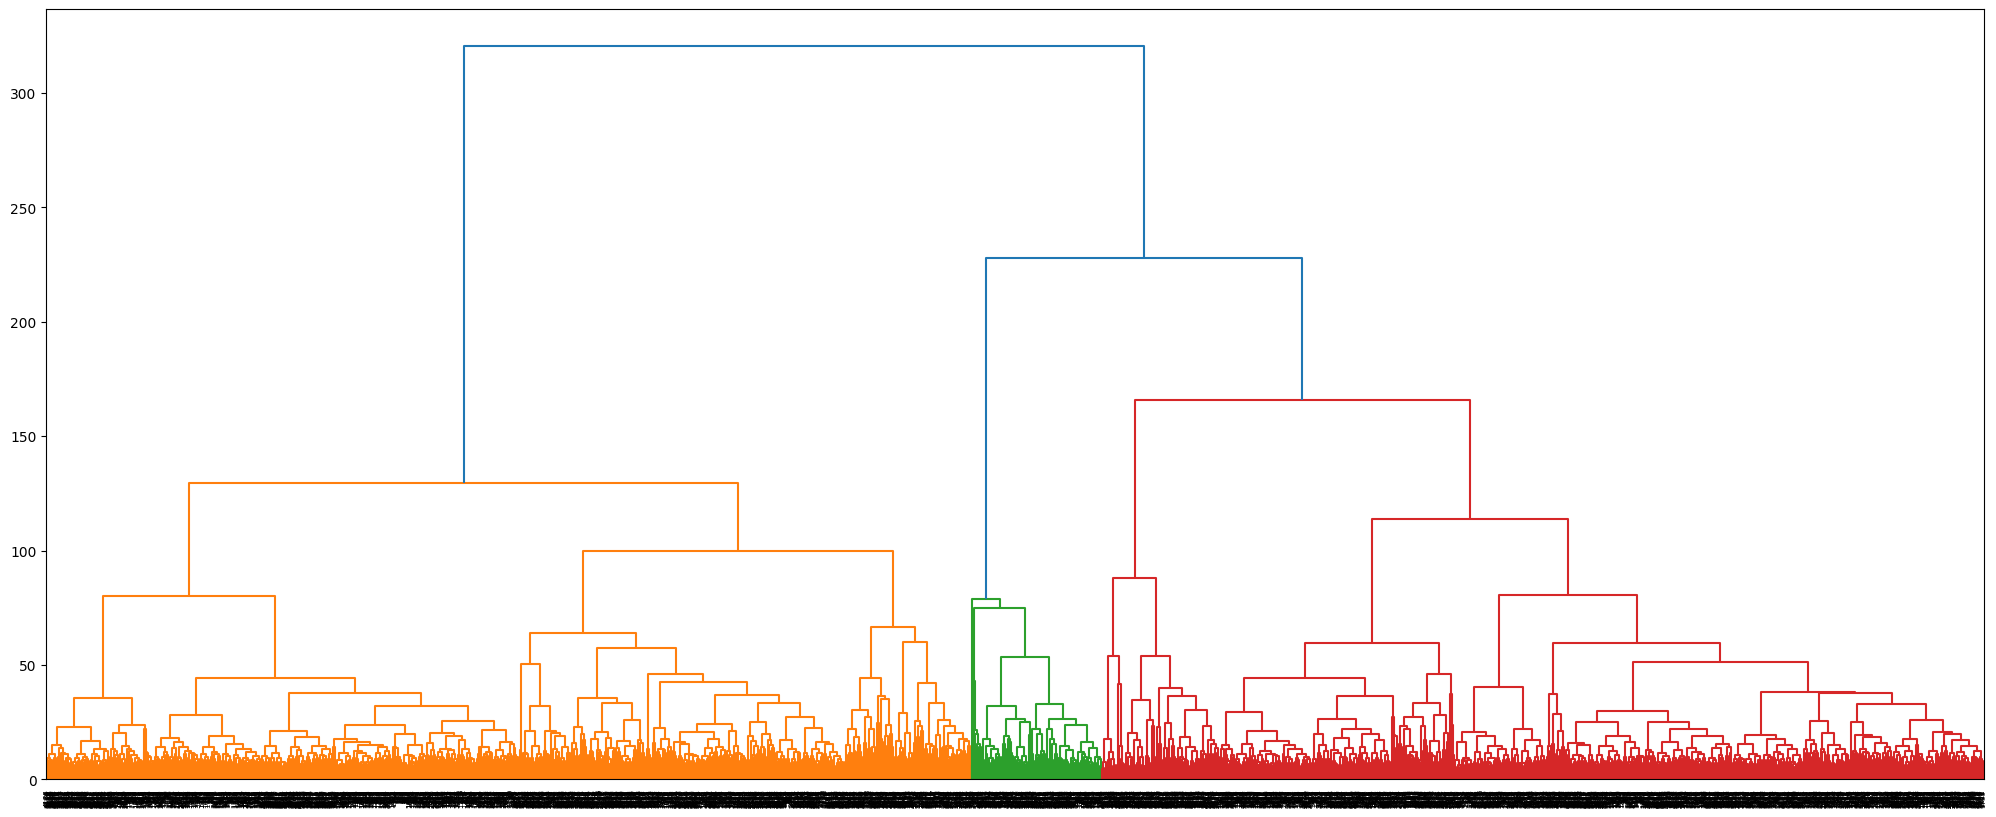

In [89]:
Z = linkage(scaledgenes, 'ward')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)

## The dendogram ward linkage ( minimizes the variance within each cluster. It tends to produce more balanced clusters), this is to see the merger between the genes when moved upward.

repeat with a different linkage and comment on differences

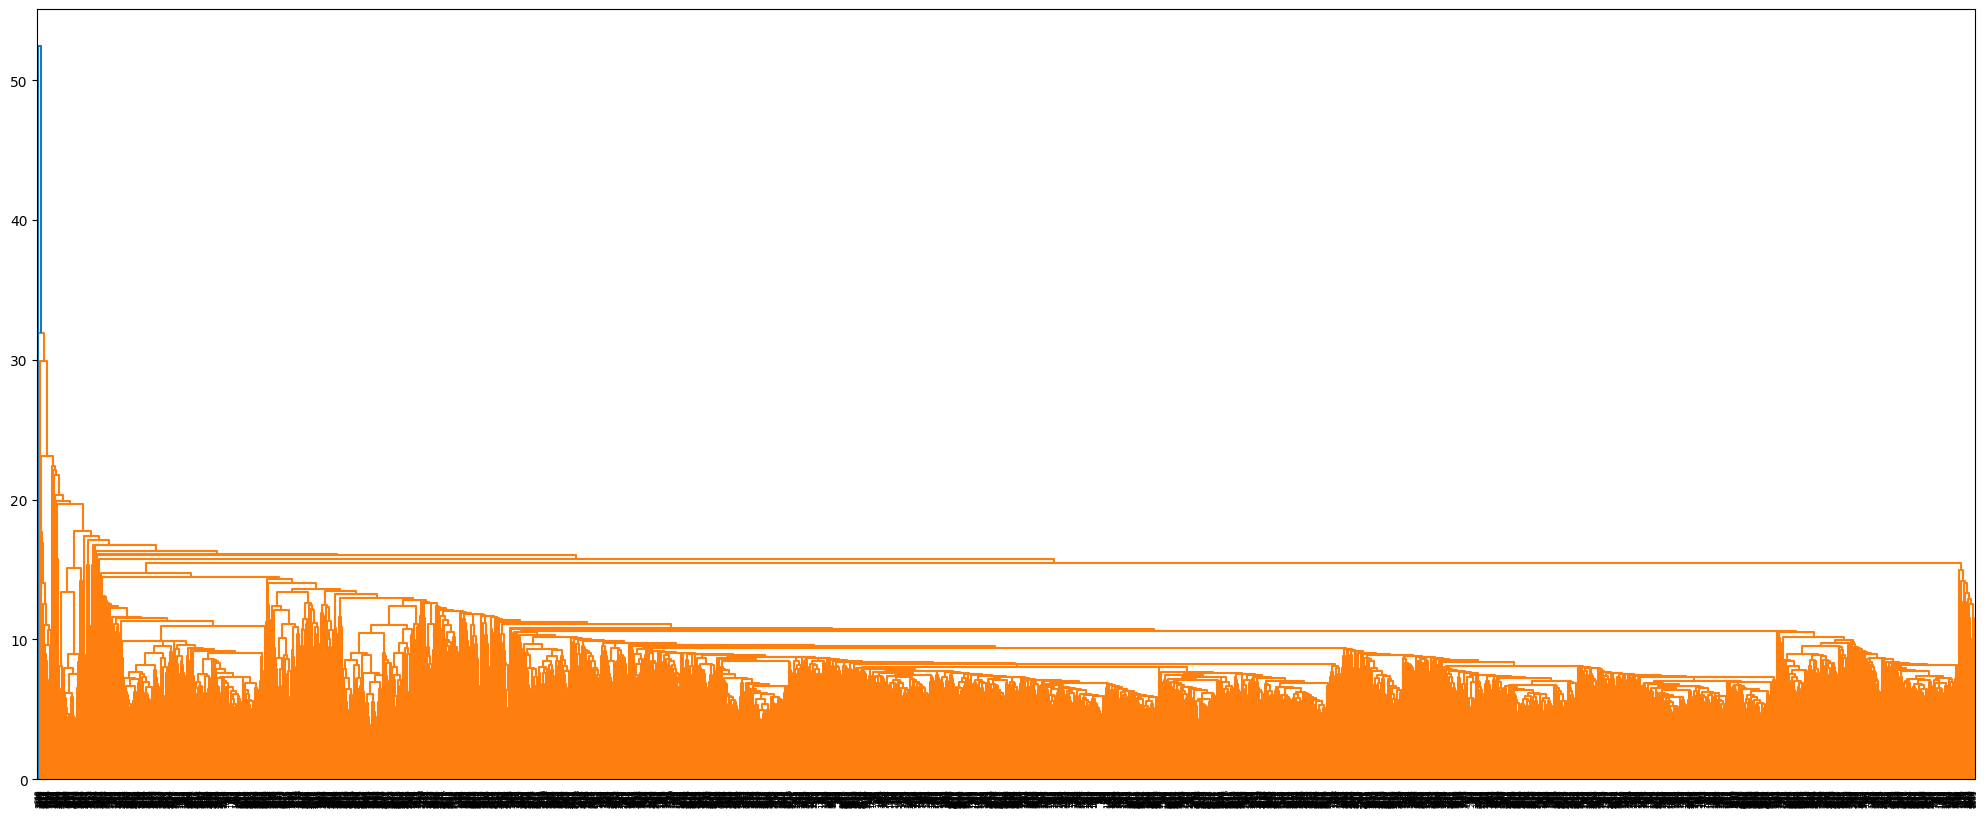

In [91]:
Z = linkage(scaledgenes, 'average')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)

## Fig 6 : This is the dendogram plot using average linkage (to the method used to measure the distance between clusters when deciding which clusters to merge at each step) as oppose to the ward, This is plotted in order to see the effect of the change of linkage in the plot

## **Comment:** looking at the dendogram ward linkage ( minimizes the variance within each cluster. It tends to produce more balanced clusters)is much better to cluster and find the linkage than the average (distance between two clusters is defined as the average distance between all pairs of points in the two clusters)
Therefore maximizing the variance seems to be better suite in this case.

# VI-b rerun agglomerative cluatering to get the "ideal" number of clusters as decided by k-means.



In [98]:
geneclustersAg = skl.cluster.AgglomerativeClustering(n_clusters=3, linkage='ward').fit(scaledgenes)

In [99]:
geneclustersAg.labels_

array([1, 1, 1, ..., 0, 0, 0])

## VI-c plot the 2D TSNE projection colorcoded as before

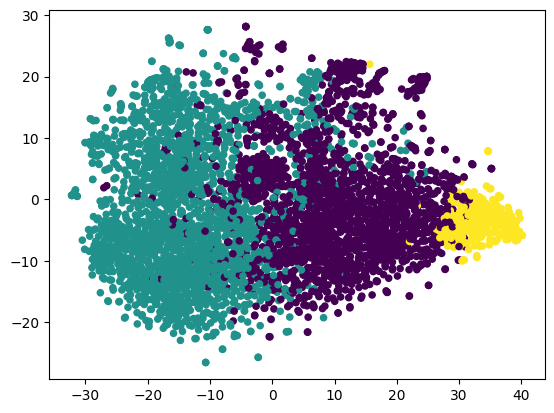

In [100]:
plt.scatter(twodproj[:, 0], twodproj[:, 1], c=geneclustersAg.labels_, cmap='viridis', s=20)

## Fig 6: t_SNE plot of the agglomerative clustering for 3 clusters, this 2-D plot if ploted in order to visualize the clustering better.

# VII Comment, in the spirit of https://www.ncbi.nlm.nih.gov/pmc/articles/PMC187526, which was the most "useful" method for clustering

## I think that the K means is doing a better job at clustering the datapoints than AgglomerativeClustering because the points lying to the extreme left are also highlighted as purple where as in K means it is clustered as the left cluster.


```
# This is formatted as code
```

